In [130]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree

## Precipitation data

Data from https://www.ncei.noaa.gov/

In [2]:
token = 'aINGVmYtICYnUyESWudUYnpFddVJacPt'

In [4]:
url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=PRECIP_HLY&stationid=COOP:406402&startdate=2004-01-01&enddate=2004-06-30&limit=1000'

r = requests.get(url, headers={'token':token})
json_data = r.json()

In [5]:
precip = pd.DataFrame(json_data['results'])

In [6]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        678 non-null    object
 1   datatype    678 non-null    object
 2   station     678 non-null    object
 3   attributes  678 non-null    object
 4   value       678 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 26.6+ KB


In [10]:
precip.shape

(678, 5)

In [19]:
def request_precip(dates):
    url = f'https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=PRECIP_HLY&stationid=COOP:406402&startdate={dates[0]}&enddate={dates[1]}&limit=1000'

    r = requests.get(url, headers={'token':token})
    json_data = r.json()
    
    temp = pd.DataFrame(json_data['results'])
    print(temp.shape)
    
    return temp
    

In [34]:
dates = [['2004-01-01', '2004-06-30'], ['2004-07-01', '2004-12-31'], 
         ['2005-01-01', '2005-06-30'], ['2005-07-01', '2005-12-31'], 
        ['2006-01-01', '2006-06-30'], ['2006-07-01', '2006-12-31'], 
        ['2007-01-01', '2007-06-30'], ['2007-07-01', '2007-12-31'], 
        ['2008-01-01', '2008-06-30'], ['2008-07-01', '2008-12-31'], 
        ['2009-01-01', '2009-06-30'], ['2009-07-01', '2009-12-31'], 
        ['2010-01-01', '2010-06-30'], ['2010-07-01', '2010-12-31'], 
        ['2011-01-01', '2011-06-30'], ['2011-07-01', '2011-12-31'], 
        ['2012-01-01', '2012-06-30'], ['2012-07-01', '2012-12-31'], 
        ['2013-01-01', '2013-06-30'], ['2013-07-01', '2013-12-31']]


In [35]:
precip = pd.DataFrame()

for date in dates:
    temp = request_precip(date)
    precip = precip.append(temp)

(678, 5)
(574, 5)
(601, 5)
(338, 5)
(558, 5)
(446, 5)
(411, 5)
(410, 5)
(520, 5)
(386, 5)
(549, 5)
(513, 5)
(619, 5)
(391, 5)
(615, 5)
(466, 5)
(409, 5)
(431, 5)
(594, 5)
(490, 5)


In [36]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 489
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9999 non-null   object
 1   datatype    9999 non-null   object
 2   station     9999 non-null   object
 3   attributes  9999 non-null   object
 4   value       9999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 468.7+ KB


In [37]:
precip.head()

,date,datatype,station,attributes,value
0,2004-01-01T01:00:00,HPCP,COOP:406402,"g,",0
1,2004-01-01T11:00:00,HPCP,COOP:406402,"T,",0
2,2004-01-01T12:00:00,HPCP,COOP:406402,"T,",0
3,2004-01-02T00:00:00,HPCP,COOP:406402,"T,",0
4,2004-01-02T01:00:00,HPCP,COOP:406402,",",10


In [38]:
precip['attributes'].value_counts()

,        4073
T,       3503
,,HI     1423
T,,HI     889
g,         85
g,,HI      26
Name: attributes, dtype: int64

In [39]:
precip['date'] = pd.to_datetime(precip['date'])

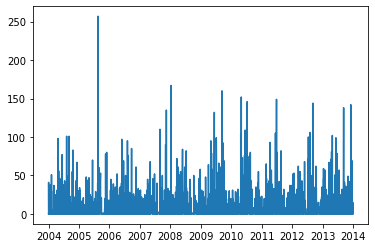

In [40]:
plt.plot(precip['date'], precip['value']);

## Rain Gage data

In [54]:
url = 'https://nwis.waterservices.usgs.gov/nwis/iv/?sites=03431040&parameterCd=00045&startDT=2016-01-01T00:00:00.000-06:00&endDT=2022-12-31T23:59:59.999-06:00&siteStatus=all&format=rdb'

sevenmile_rain = pd.read_csv(url, skiprows=27, delimiter='\t', low_memory=False)
sevenmile_rain_meta = pd.read_csv(url, delimiter='\t', skiprows=12, nrows=13)


In [65]:
url = 'https://nwis.waterservices.usgs.gov/nwis/iv/?sites=03431040&parameterCd=00065&startDT=2016-01-01T00:00:00.000-06:00&endDT=2022-12-31T23:59:59.999-06:00&siteStatus=all&format=rdb'

sevenmile_gage = pd.read_csv(url, skiprows=27, delimiter='\t', low_memory=False)
sevenmile_gage_meta = pd.read_csv(url, delimiter='\t', skiprows=12, nrows=13)



In [55]:
sevenmile_rain = sevenmile_rain.drop(0)
sevenmile_rain.head()

,agency_cd,site_no,datetime,tz_cd,131087_00045,131087_00045_cd
1,USGS,03431040,2016-01-01 00:00,CST,0.00,A
2,USGS,03431040,2016-01-01 00:15,CST,0.00,A
3,USGS,03431040,2016-01-01 00:30,CST,0.00,A
4,USGS,03431040,2016-01-01 00:45,CST,0.00,A
5,USGS,03431040,2016-01-01 01:00,CST,0.00,A


In [66]:
sevenmile_gage = sevenmile_gage.drop(0)
sevenmile_gage.head()

,agency_cd,site_no,datetime,tz_cd,131085_00065,131085_00065_cd
1,USGS,03431040,2016-01-01 00:00,CST,2.33,A
2,USGS,03431040,2016-01-01 00:15,CST,2.33,A
3,USGS,03431040,2016-01-01 00:30,CST,2.33,A
4,USGS,03431040,2016-01-01 00:45,CST,2.33,A
5,USGS,03431040,2016-01-01 01:00,CST,2.33,A


In [68]:
sevenmile_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239048 entries, 1 to 239048
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   agency_cd        239048 non-null  object
 1   site_no          239048 non-null  object
 2   datetime         239048 non-null  object
 3   tz_cd            239048 non-null  object
 4   131087_00045     239048 non-null  object
 5   131087_00045_cd  239048 non-null  object
dtypes: object(6)
memory usage: 12.8+ MB


In [69]:
sevenmile_gage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703294 entries, 1 to 703294
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   agency_cd        703294 non-null  object
 1   site_no          703294 non-null  object
 2   datetime         703294 non-null  object
 3   tz_cd            703294 non-null  object
 4   131085_00065     703294 non-null  object
 5   131085_00065_cd  703294 non-null  object
dtypes: object(6)
memory usage: 37.6+ MB


In [108]:
sevenmile = pd.merge(sevenmile_gage, sevenmile_rain, how='right', on='datetime')

In [109]:
sevenmile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239104 entries, 0 to 239103
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   agency_cd_x      238310 non-null  object
 1   site_no_x        238310 non-null  object
 2   datetime         239104 non-null  object
 3   tz_cd_x          238310 non-null  object
 4   131085_00065     238310 non-null  object
 5   131085_00065_cd  238310 non-null  object
 6   agency_cd_y      239104 non-null  object
 7   site_no_y        239104 non-null  object
 8   tz_cd_y          239104 non-null  object
 9   131087_00045     239104 non-null  object
 10  131087_00045_cd  239104 non-null  object
dtypes: object(11)
memory usage: 21.9+ MB


In [110]:
sevenmile = sevenmile.drop(['agency_cd_x', 'site_no_x', 'tz_cd_x', 'agency_cd_y', 'site_no_y', 'tz_cd_y'], axis=1)

sevenmile = sevenmile.rename({'131085_00065': 'gage_height', '131085_00065_cd': 'gage_height_code', 
                   '131087_00045': 'rain', '131087_00045_cd': 'rain_code'}, axis=1)

sevenmile[['gage_height', 'rain']] = sevenmile[['gage_height', 'rain']].astype('float')

sevenmile['datetime'] = pd.to_datetime(sevenmile['datetime'])
sevenmile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239104 entries, 0 to 239103
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          239104 non-null  datetime64[ns]
 1   gage_height       238310 non-null  float64       
 2   gage_height_code  238310 non-null  object        
 3   rain              239104 non-null  float64       
 4   rain_code         239104 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 10.9+ MB


In [111]:
sevenmile['year'] = sevenmile['datetime'].dt.year
sevenmile['month'] = sevenmile['datetime'].dt.month
sevenmile['day'] = sevenmile['datetime'].dt.dayofyear

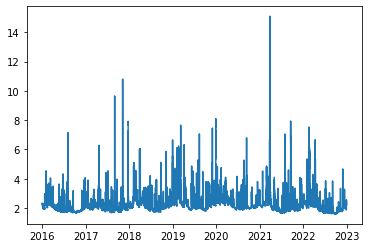

In [102]:
plt.plot(sevenmile['datetime'], sevenmile['gage_height']);

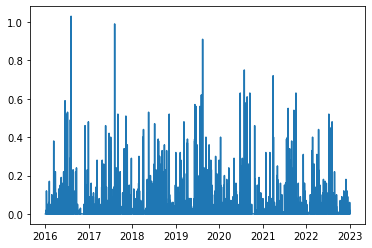

In [103]:
plt.plot(sevenmile['datetime'], sevenmile['rain']);

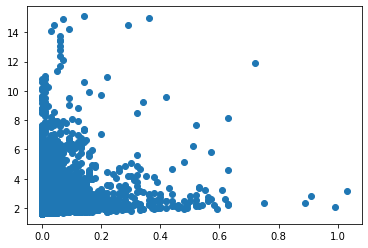

In [105]:
plt.scatter(sevenmile['rain'], sevenmile['gage_height']);

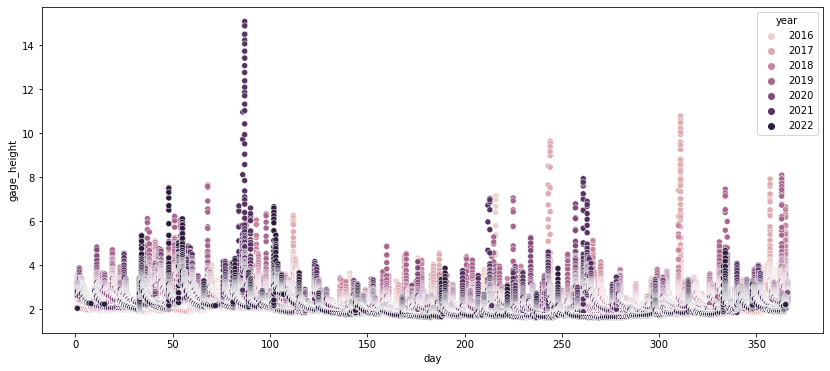

In [124]:
fig, ax = plt.subplots(figsize=(14,6))
sns.scatterplot(x='day', y='gage_height', data=sevenmile, hue='year', ax=ax);

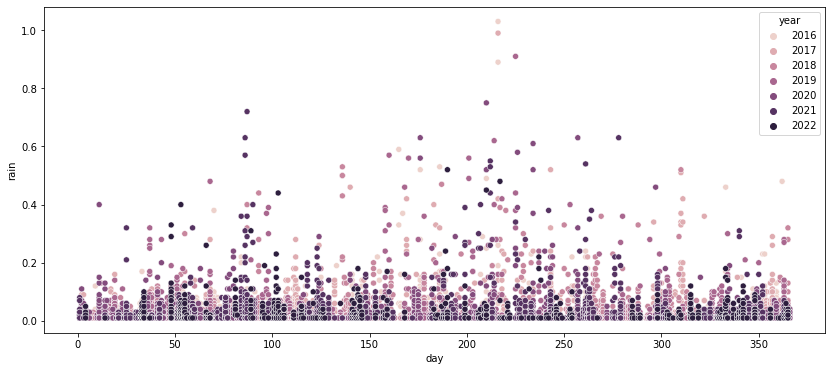

In [121]:
fig, ax = plt.subplots(figsize=(14,6))
sns.scatterplot(x='day', y='rain', data=sevenmile[sevenmile['rain'] > 0], hue='year', ax=ax);

In [116]:
sevenmile.head()

,datetime,gage_height,gage_height_code,rain,rain_code,year,month,day
0,2016-01-01 00:00:00,2.33,A,0.0,A,2016,1,1
1,2016-01-01 00:15:00,2.33,A,0.0,A,2016,1,1
2,2016-01-01 00:30:00,2.33,A,0.0,A,2016,1,1
3,2016-01-01 00:45:00,2.33,A,0.0,A,2016,1,1
4,2016-01-01 01:00:00,2.33,A,0.0,A,2016,1,1


In [131]:
X = sevenmile[['rain', 'month', 'day']].values
y = sevenmile['gage_height'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)